# **Angular 17**

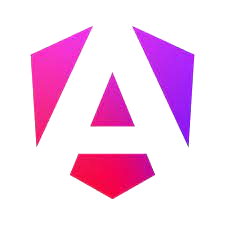

# **Servicios Recuperar datos de un servidor web**

La propuesta del framework de Angular es delegar todas las responsabilidades de acceso a datos (peticiones y envío de datos) y lógica de negocios en otras clases que colaboran con las componentes. Estas clases en Angular se las llama #*servicios.


# **Reto**

Desarrollar una aplicación Angular que permita traer datos de un BackEnd funcional. Desde la componente acceder al servicio (consumir) que permite vincular los datos del BackEnd y mostrar la información.


Elaborar una Base de Datos MySQL con la siguiente Tabla.


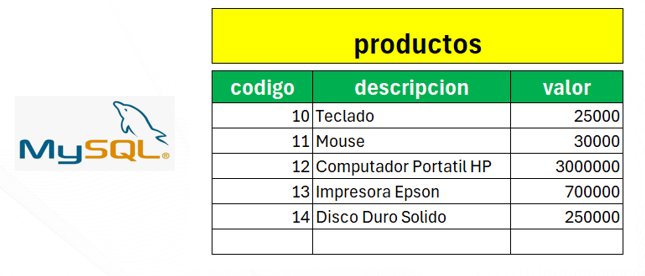

Utilizando NodeJS y JS crear un proyecto BackEnd que permita crear un EndPoint para Listar

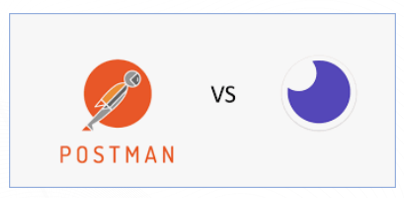

# **Pasos**

1. Crear la carpeta que va a contener el proyecto
2. Abrir la carpeta con VSC
3. Crear proyecto Angular   ng new app
4. Seleccionamos estilo CSS - Enter
   
   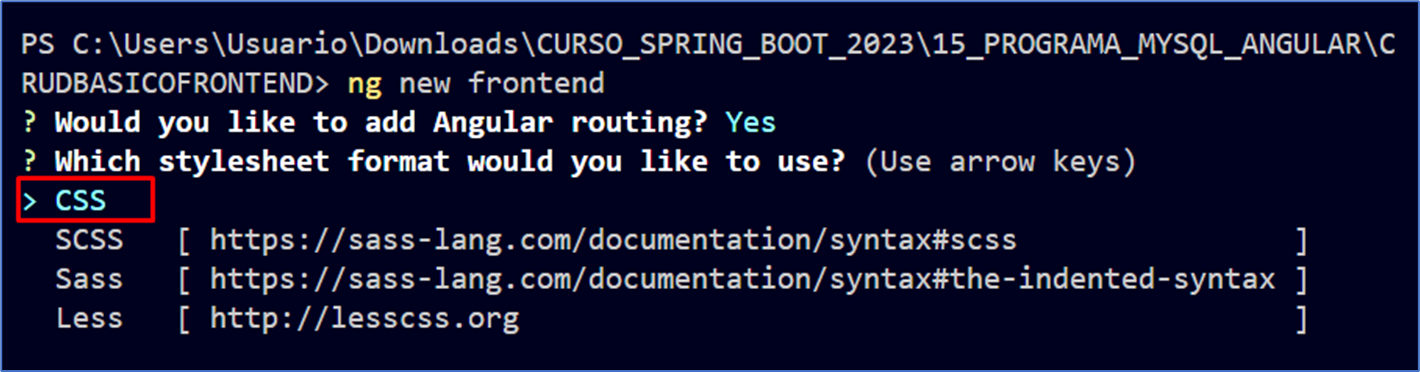

5. Desea crear rutas   (y/N)   Y
   
   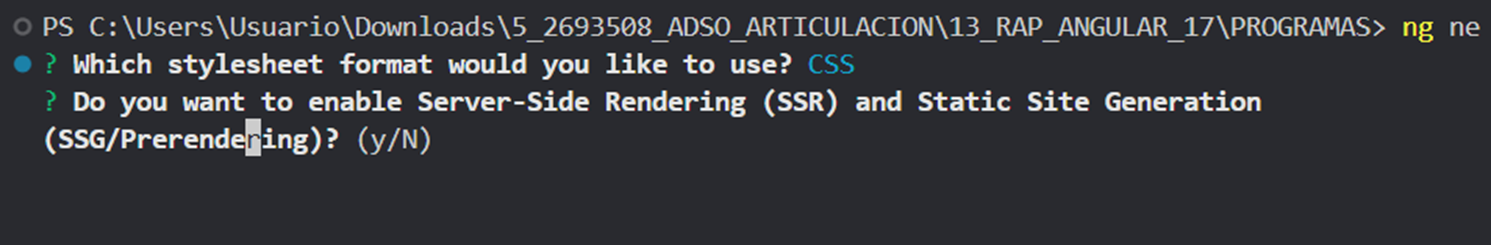

6. ha finalizado el proceso de creación del proyecto
   
   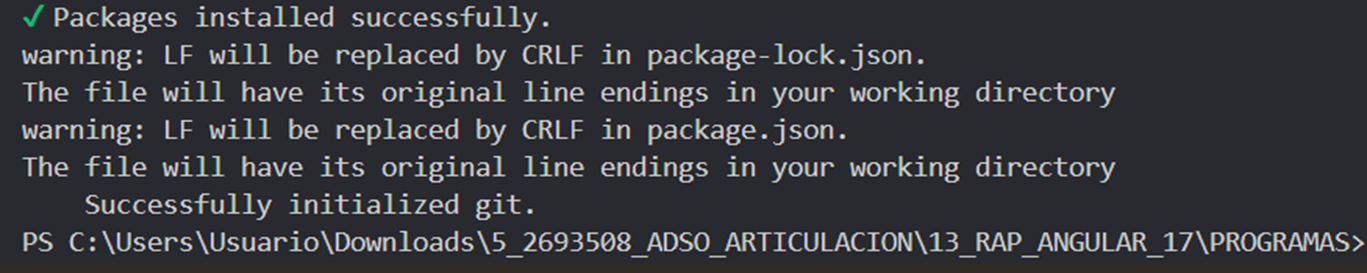

7. Ingresamos a la carpeta del proyecto CD  <nombre del proyecto>
   
8. Correr el proyecto verificar funcionalidad
   
   ng serve -o 

9. Resultados

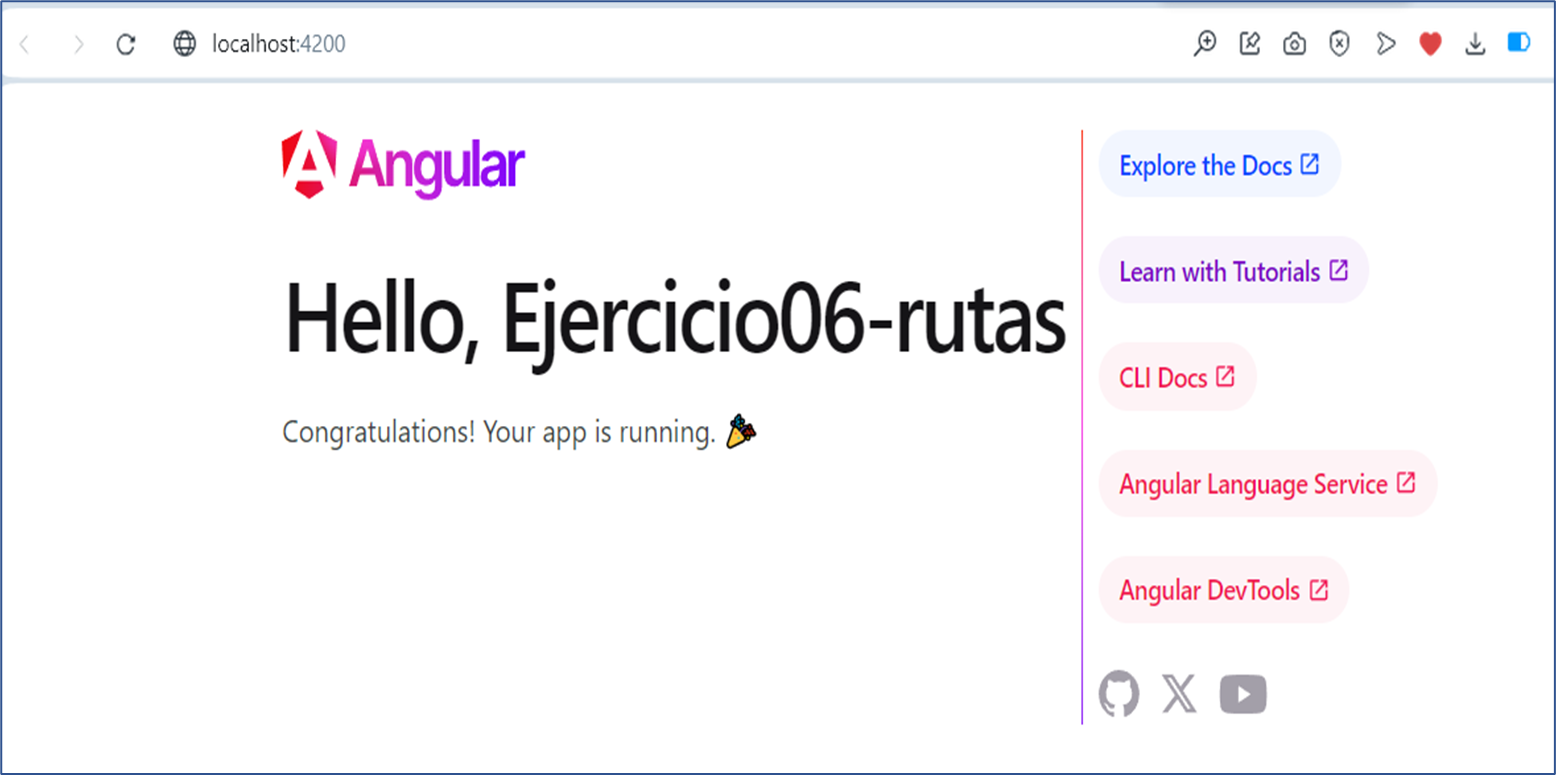



# **Crear el servicio**



ng generate service productos

ng g s productos

Al ejecutar este cvomando se deben crear los siguientes dos archivos:

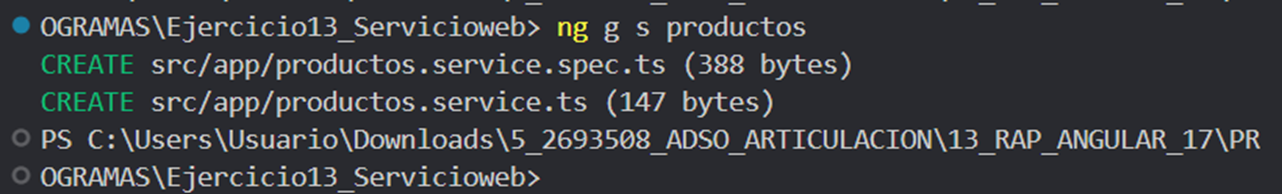

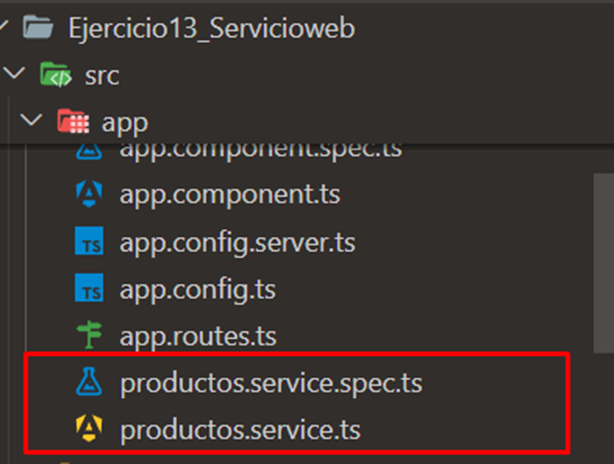

El código generado para el servicio es el siguiente:

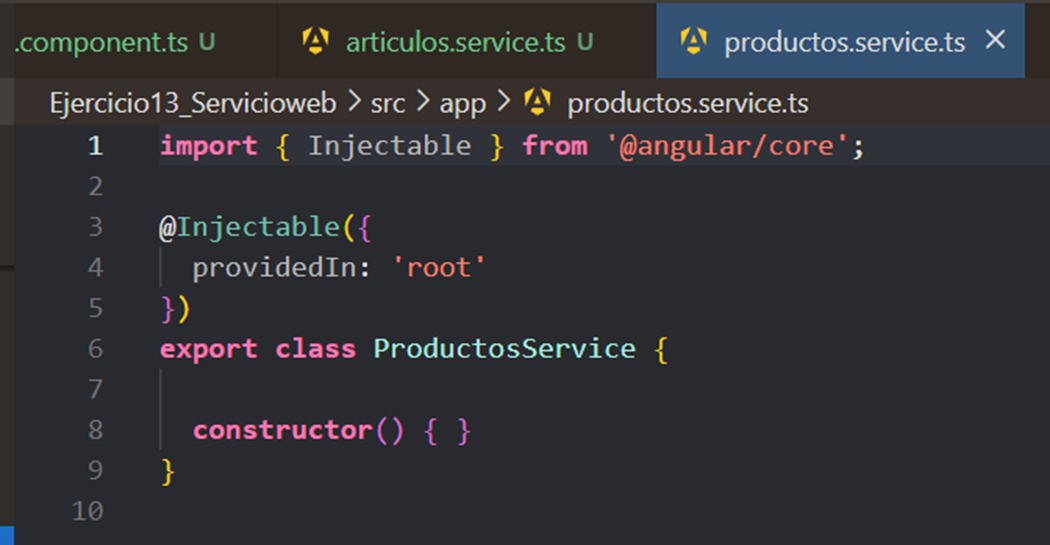



Hacer la configuración para poder vincular en BackEnd en Angular a trraves del FrontEnd componente Servicio

In [ ]:
import { HttpClient } from '@angular/common/http';
import { Injectable } from '@angular/core';

@Injectable({
  providedIn: 'root'
})
export class ProductosService {

  constructor(private http: HttpClient) {  }

    retornar() {

      return this.http.get('http://localhost:3000/productos');
    }
}


Debemos unicar el archivo app.config.ts y agregar las dos librerias:



In [ ]:
import { ApplicationConfig } from '@angular/core';
import { provideRouter } from '@angular/router';
import { routes } from './app.routes';
import { provideHttpClient } from '@angular/common/http';
import { withFetch } from '@angular/common/http';

export const appConfig: ApplicationConfig = {
  providers: [provideRouter(routes), provideHttpClient(withFetch())]
};



Ahora veremos como consumimos el servicio desde nuestra componente. 

Procedemos a modificar la componente que se crea por defecto 'AppComponent' que tiene por responsabilidad mostrar en la página el listado de productos:

archivo: app.component.ts


In [ ]:
import { Component } from '@angular/core';
import { CommonModule } from '@angular/common';
import { RouterOutlet } from '@angular/router';
import { ProductosService } from ‘./productos.service';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, RouterOutlet],
  templateUrl: './app.component.html',
  styleUrls: ['./app.component.css']
})

export class AppComponent {

  productos: any;

  constructor(private productosService: ProductosService) {
    this.productosService.retornar()
      .subscribe(result => this.productos = result)
  }
}

EN el archivo anterior vemos:

 Primero importamos el servicio llamado ProductosService que se almacena en el archivo ‘productos.service.ts':


In [ ]:
import { ProductosService } from ‘./productos.service';


Para inyectar el objeto de la clase 'ArticulosService' que crea Angular en forma automática lo hacemos en el parámetro del constructor::


In [ ]:
constructor(private articulosServicio: ArticulosService) {
    this.articulos=this.articulosServicio.retornar();
  }



Falta que codifiquemos la vista con los datos recuperados:
app.component.html



In [ ]:
<table>
  <tr>
    <td>Codigo</td><td>Descripcion</td><td>Precio</td>
  </tr>
  @for(pro of productos;track pro.codigo) {
  <tr>
    <td>{{pro.codigo}}</td>
    <td>{{pro.descripcion}}</td>
    <td>{{pro.precio}}</td>
  </tr>
}
</table>
<router-outlet />


Resultado al ejecutar:

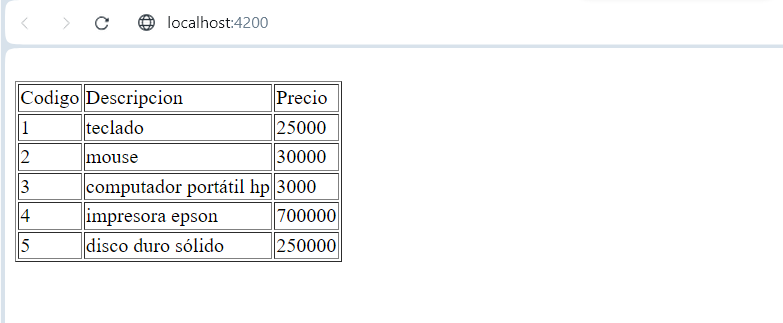